In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [3]:
google_play_df = pd.read_csv("data/googleplaystore.csv")
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google_play_reviews_df = pd.read_csv("data/googleplaystore_user_reviews.csv")
google_play_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
#Data cleaning 
#remove dups

print(google_play_df.shape)
google_play_df.drop_duplicates(inplace=True)
print(google_play_df.shape)



(10358, 13)
(10358, 13)


In [7]:
#check for Nans
google_play_df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
google_play_df[google_play_df['Rating']==0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [9]:
#replace missing ratings w 0 - 0 is not used a rating by this dataset

google_play_df['Rating'].fillna(0, inplace=True)
google_play_df.isna().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [10]:
#look for unusal category

google_play_df['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [11]:
#cat 1.9 does not make sense so we are removing it

google_play_df =  google_play_df[google_play_df['Category']!='1.9']
print(google_play_df.shape)
google_play_df['Category'].value_counts()



(10357, 13)


FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

# Question 1: 
Which app category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

In [13]:
#One way to answer the question is to simply aggregate ratings by category. 
#Below, we produce the aggregate median rating by category.
# by using the median, the ratings of 0 don't 'pull down' the overall rating

median_rating_by_category = google_play_df[['Category', 'Rating']].groupby('Category').median().sort_values(by='Rating', ascending=False)
median_rating_by_category.head(5)
# get the top 5


,Rating
Category,
ART_AND_DESIGN,4.40
HEALTH_AND_FITNESS,4.40
EDUCATION,4.40
COMICS,4.35
PARENTING,4.35


# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

In [31]:
df_size = google_play_df['Size'].sort_values()
df_size.tail()

def size_converter(string):
    if string == 'Varies with device':
        size = np.nan
    else:
        unit = string[-1]
        num_string = string[:-1]
        num = float(num_string)
        if unit == 'k':
            size = num
        elif unit == 'M':
            size = num*1000
    return size

google_play_df['Size'] = google_play_df['Size'].apply(size_converter)
df_size = google_play_df['Size'].sort_values()
df_size.tail()

10713   NaN
10725   NaN
10765   NaN
10826   NaN
10839   NaN
Name: Size, dtype: float64

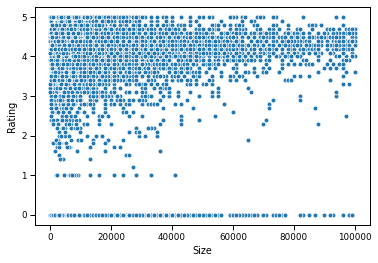

In [37]:
sns.set_context('paper')
ax = sns.scatterplot(x="Size", y="Rating", data=google_play_df)


# For this next section, choose a Category of playstore apps

## Category Chosen: [insert here]



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

In [52]:
df_ed_apps = google_play_df[google_play_df['Category']=='EDUCATION']
print(df_ed_apps.shape)
series = df_ed_apps['Genres'].value_counts()
series

(130, 13)


Education                       107
Education;Education              11
Education;Pretend Play            4
Education;Brain Games             3
Education;Creativity              3
Education;Music & Video           1
Education;Action & Adventure      1
Name: Genres, dtype: int64

# Question 4: You choose what you want to investigate